<a href="https://colab.research.google.com/github/blaze-fire/Job_a_thon_June_2022/blob/main/job_a_thon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !git clone https://github.com/blaze-fire/Job_a_thon_June_2022.git

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df = pd.read_csv(os.getcwd()+'/data/train.csv')

In [3]:
# df.drop('id', axis=1, inplace=True)
df.head()

,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,2021-01-01,1,2,2,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2021-01-01,2,1,2,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,2021-01-01,9,3,3,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,2021-01-01,6,7,2,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2021-01-01,4,6,2,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   created_at            39161 non-null  object
 1   campaign_var_1        39161 non-null  int64 
 2   campaign_var_2        39161 non-null  int64 
 3   products_purchased    39161 non-null  int64 
 4   signup_date           39161 non-null  object
 5   user_activity_var_1   39161 non-null  int64 
 6   user_activity_var_2   39161 non-null  int64 
 7   user_activity_var_3   39161 non-null  int64 
 8   user_activity_var_4   39161 non-null  int64 
 9   user_activity_var_5   39161 non-null  int64 
 10  user_activity_var_6   39161 non-null  int64 
 11  user_activity_var_7   39161 non-null  int64 
 12  user_activity_var_8   39161 non-null  int64 
 13  user_activity_var_9   39161 non-null  int64 
 14  user_activity_var_10  39161 non-null  int64 
 15  user_activity_var_11  39161 non-null

In [5]:
# Name of Day of week
df['created_at_day_of_week'] = pd.to_datetime(df['created_at']).dt.day_name()
df['signup_date_day_of_week'] = pd.to_datetime(df['signup_date']).dt.day_name()

In [6]:
# Day of week
df['created_at_dow'] = pd.to_datetime(df['created_at']).dt.dayofweek
df['signup_date_dow'] = pd.to_datetime(df['signup_date']).dt.dayofweek

In [7]:
#isweekwnd

df['created_at_isWeekwnd'] = np.where(df['created_at_day_of_week'].isin(['Sunday', 'Saturday']), 1, 0)
df['signup_date_dow_isWeekwnd'] = np.where(df['signup_date_day_of_week'].isin(['Sunday', 'Saturday']), 1, 0)

In [8]:
#week of year

df['created_at_dateWeek'] = pd.to_datetime(df['created_at']).dt.isocalendar().week.astype(np.int8)
df['signup_date_dow_dateWeek'] = pd.to_datetime(df['signup_date']).dt.isocalendar().week.astype(np.int8)

In [9]:
# quarter of year

df['created_at_quarter'] = pd.to_datetime(df['created_at']).dt.quarter
df['signup_date_dow_quarter'] = pd.to_datetime(df['signup_date']).dt.quarter

In [10]:
# days between user signed up and the lead was dropped 

df['lead_dropped_Minus_signup_date_Days'] = (pd.to_datetime(df['created_at']) - pd.to_datetime(df['signup_date'])).dt.days

In [11]:
# months between user signed up and the lead was dropped

df['lead_dropped_Minus_signup_date_Months'] = np.round((pd.to_datetime(df['created_at']) - pd.to_datetime(df['signup_date']))/np.timedelta64(1,'M'), 0)

In [12]:
df.head()

,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,...,created_at_dow,signup_date_dow,created_at_isWeekwnd,signup_date_dow_isWeekwnd,created_at_dateWeek,signup_date_dow_dateWeek,created_at_quarter,signup_date_dow_quarter,lead_dropped_Minus_signup_date_Days,lead_dropped_Minus_signup_date_Months
0,2021-01-01,1,2,2,2020-09-24,0,0,0,0,0,...,4,3,0,0,53,39,1,3,99,3.0
1,2021-01-01,2,1,2,2020-09-19,1,0,1,0,0,...,4,5,0,1,53,38,1,3,104,3.0
2,2021-01-01,9,3,3,2021-08-11,1,0,0,0,0,...,4,2,0,0,53,32,1,3,-222,-7.0
3,2021-01-01,6,7,2,2017-10-04,0,0,0,0,0,...,4,2,0,0,53,40,1,4,1185,39.0
4,2021-01-01,4,6,2,2020-06-08,0,0,0,0,0,...,4,0,0,0,53,24,1,2,207,7.0


<b>Cyclic Feature Encoding</b> <br>
<p>
Data that has a unique set of values that repeat in a cycle are known as cyclic data. Time-related features are mainly cyclic in nature. For example, months of a year, days of a week, hours of time, minutes of time etc... These features have a set of values and all the observations will have a value from this set only. In many ML problems, we encounter such features. Handling such features properly have proved to help in the improvement of accuracy.
</p>

Post: https://stackoverflow.com/a/70485603

In [13]:
def encode(data, col, max_val):
    data[col + '_sin'] = data[col].apply(lambda x: np.round(np.sin(2 * np.pi * float(x)/max_val), 5) if pd.notnull(x) else x)
    data[col + '_cos'] = data[col].apply(lambda x: np.round(np.cos(2 * np.pi * float(x)/max_val), 5) if pd.notnull(x) else x)
    data.drop(col, axis=1, inplace=True)
    return data

In [14]:
# extract month 

df['created_at_month'] = pd.to_datetime(df['created_at']).dt.month
df['signup_date_month'] = pd.to_datetime(df['signup_date']).dt.month

In [15]:
# extract day

df['created_at_date'] = pd.to_datetime(df['created_at']).dt.day
df['signup_date_date'] = pd.to_datetime(df['signup_date']).dt.day

In [16]:
# get year of signup of the user for created_at column the year is constant
df['signup_year'] = pd.to_datetime(df['signup_date']).dt.year

In [17]:
df = encode(df, 'created_at_month', 12)
df = encode(df, 'signup_date_month', 12)

In [18]:
df = encode(df, 'created_at_date', 31)
df = encode(df, 'signup_date_date', 31)

In [19]:
df.head()

,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,...,lead_dropped_Minus_signup_date_Months,signup_year,created_at_month_sin,created_at_month_cos,signup_date_month_sin,signup_date_month_cos,created_at_date_sin,created_at_date_cos,signup_date_date_sin,signup_date_date_cos
0,2021-01-01,1,2,2,2020-09-24,0,0,0,0,0,...,3.0,2020,0.5,0.86603,-1.00000,-0.0,0.2013,0.97953,-0.98847,0.15143
1,2021-01-01,2,1,2,2020-09-19,1,0,1,0,0,...,3.0,2020,0.5,0.86603,-1.00000,-0.0,0.2013,0.97953,-0.65137,-0.75876
2,2021-01-01,9,3,3,2021-08-11,1,0,0,0,0,...,-7.0,2021,0.5,0.86603,-0.86603,-0.5,0.2013,0.97953,0.79078,-0.61211
3,2021-01-01,6,7,2,2017-10-04,0,0,0,0,0,...,39.0,2017,0.5,0.86603,-0.86603,0.5,0.2013,0.97953,0.72479,0.68897
4,2021-01-01,4,6,2,2020-06-08,0,0,0,0,0,...,7.0,2020,0.5,0.86603,0.00000,-1.0,0.2013,0.97953,0.99872,-0.05065


## fill missing values

In [19]:
df.isnull().sum()

created_at                    0
campaign_var_1                0
campaign_var_2                0
products_purchased        20911
signup_date               15113
user_activity_var_1           0
user_activity_var_2           0
user_activity_var_3           0
user_activity_var_4           0
user_activity_var_5           0
user_activity_var_6           0
user_activity_var_7           0
user_activity_var_8           0
user_activity_var_9           0
user_activity_var_10          0
user_activity_var_11          0
user_activity_var_12          0
buy                           0
created_at_day_of_week        0
created_at_dow                0
created_at_isWeekwnd          0
created_at_dateWeek           0
created_at_quarter            0
signup_date_month         15113
signup_date_date          15113
signup_year               15113
created_at_month_sin          0
created_at_month_cos          0
created_at_date_sin           0
created_at_date_cos           0
dtype: int64

In [21]:
df_prods_purchased = df.select_dtypes(exclude='object').drop(['signup_year', 'signup_date_date', 'signup_date_month','buy'], axis=1)

In [22]:
df_prods_purchased.isnull().sum()

campaign_var_1              0
campaign_var_2              0
products_purchased      20911
user_activity_var_1         0
user_activity_var_2         0
user_activity_var_3         0
user_activity_var_4         0
user_activity_var_5         0
user_activity_var_6         0
user_activity_var_7         0
user_activity_var_8         0
user_activity_var_9         0
user_activity_var_10        0
user_activity_var_11        0
user_activity_var_12        0
created_at_dow              0
created_at_isWeekwnd        0
created_at_dateWeek         0
created_at_quarter          0
created_at_month_sin        0
created_at_month_cos        0
created_at_date_sin         0
created_at_date_cos         0
dtype: int64

In [33]:
X_train = df_prods_purchased[~df_prods_purchased['products_purchased'].isnull()].drop(['products_purchased'], axis=1)
y_train = df_prods_purchased[~df_prods_purchased['products_purchased'].isnull()]['products_purchased'].astype(np.int8)

In [45]:
X_test =  df[df['products_purchased'].isnull()].select_dtypes(exclude='object').drop(['signup_year', 'signup_date_date', 'signup_date_month', 'products_purchased', 'buy'], axis=1)

In [46]:
X_train.head()

,campaign_var_1,campaign_var_2,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,...,user_activity_var_11,user_activity_var_12,created_at_dow,created_at_isWeekwnd,created_at_dateWeek,created_at_quarter,created_at_month_sin,created_at_month_cos,created_at_date_sin,created_at_date_cos
0,1,2,0,0,0,0,0,0,1,1,...,0,0,4,0,53,1,0.5,0.86603,0.2013,0.97953
1,2,1,1,0,1,0,0,0,1,0,...,0,0,4,0,53,1,0.5,0.86603,0.2013,0.97953
2,9,3,1,0,0,0,0,0,0,0,...,0,0,4,0,53,1,0.5,0.86603,0.2013,0.97953
3,6,7,0,0,0,0,0,0,0,0,...,0,0,4,0,53,1,0.5,0.86603,0.2013,0.97953
5,3,4,0,0,0,0,0,1,0,0,...,0,0,4,0,53,1,0.5,0.86603,0.2013,0.97953


In [47]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(sampling_strategy='auto')
X_train_balanced, y_train_balanced = oversample.fit_resample(X_train, y_train)

In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y_train_balanced = le.fit_transform(y_train_balanced)

In [49]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': np.arange(0.06, 0.09, 0.01),
    'n_estimators': np.arange(101, 110),
}

grid_search = GridSearchCV(XGBClassifier(n_estimators=108, learning_rate = 0.06,max_depth=3, verbose=5, tree_method = 'gpu_hist'), param_grid, scoring='f1_macro', cv=5, verbose=5)
grid_search.fit(X_train, y_train)

grid_search.best_score_
grid_search.best_params_


In [50]:
from xgboost import XGBClassifier
xgbClfBest = XGBClassifier(n_estimators=108, learning_rate = 0.06,max_depth=3, verbose=5)
xgbClfBest.fit(X_train_balanced, y_train_balanced)
pred = le.inverse_transform(xgbClfBest.predict(X_test))

[22:09:59] WARNING: ../src/learner.cc:627: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [52]:
X_test['products_purchased'] = pred
X_train['products_purchased'] = y_train

In [53]:
final_df_prod_purchased = pd.concat([X_train, X_test], axis=0)
final_df_prod_purchased.reset_index(inplace=True)
final_df_prod_purchased.sort_values(by='index', inplace=True)
final_df_prod_purchased.drop('index', axis=1, inplace=True)
final_df_prod_purchased.reset_index(drop=True, inplace=True)

In [54]:
df['products_purchased'] = final_df_prod_purchased['products_purchased']

In [55]:
df.head()

,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,...,created_at_isWeekwnd,created_at_dateWeek,created_at_quarter,signup_date_month,signup_date_date,signup_year,created_at_month_sin,created_at_month_cos,created_at_date_sin,created_at_date_cos
0,2021-01-01,1,2,2,2020-09-24,0,0,0,0,0,...,0,53,1,9.0,24.0,2020.0,0.5,0.86603,0.2013,0.97953
1,2021-01-01,2,1,2,2020-09-19,1,0,1,0,0,...,0,53,1,9.0,19.0,2020.0,0.5,0.86603,0.2013,0.97953
2,2021-01-01,9,3,3,2021-08-11,1,0,0,0,0,...,0,53,1,8.0,11.0,2021.0,0.5,0.86603,0.2013,0.97953
3,2021-01-01,6,7,2,2017-10-04,0,0,0,0,0,...,0,53,1,10.0,4.0,2017.0,0.5,0.86603,0.2013,0.97953
4,2021-01-01,4,6,2,2020-06-08,0,0,0,0,0,...,0,53,1,6.0,8.0,2020.0,0.5,0.86603,0.2013,0.97953





## Missing signup date






In [111]:
df.isnull().sum()

created_at              0
campaign_var_1          0
campaign_var_2          0
products_purchased      0
signup_date             0
user_activity_var_1     0
user_activity_var_2     0
user_activity_var_3     0
user_activity_var_4     0
user_activity_var_5     0
user_activity_var_6     0
user_activity_var_7     0
user_activity_var_8     0
user_activity_var_9     0
user_activity_var_10    0
user_activity_var_11    0
user_activity_var_12    0
buy                     0
dtype: int64

In [109]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)

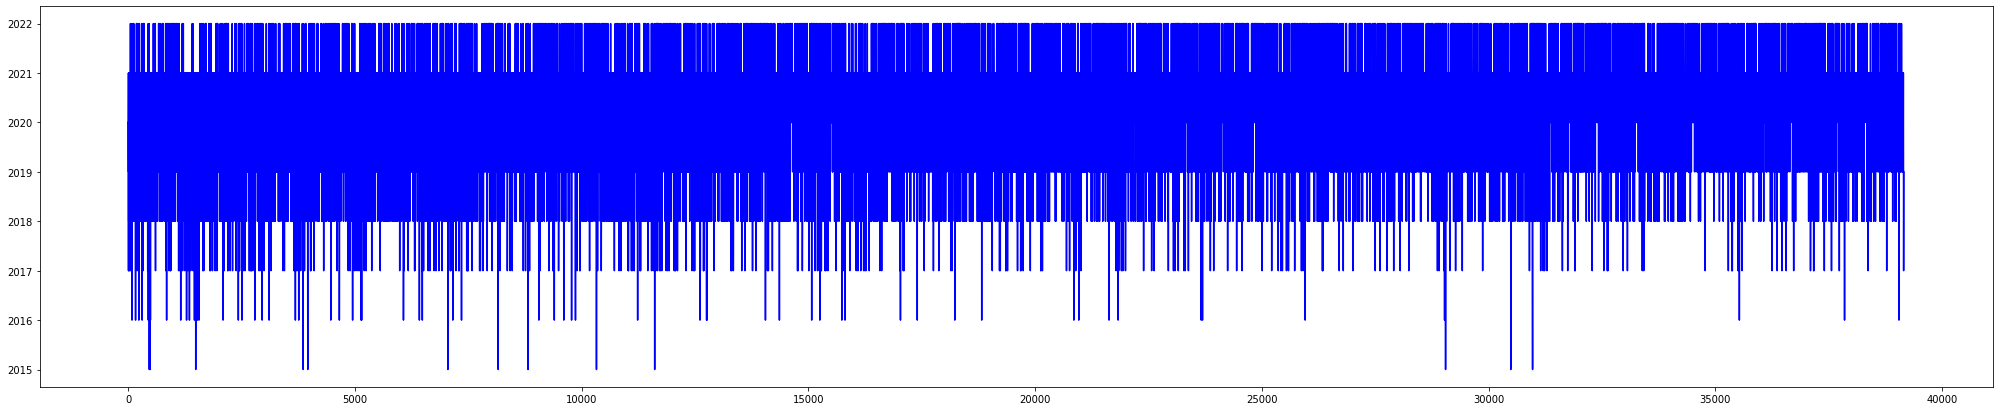

In [24]:
plt.rcParams['figure.figsize']=(35,7)
plt.plot(df['signup_year'].interpolate(option='spline'), color='blue')
plt.show()

In [61]:
df['year'] = np.int16(np.round(df['signup_year'].interpolate(option='spline'), 0))
df['month'] = np.int8(np.round(df['signup_date_month'].interpolate(option='spline'), 0))
df['day'] = np.int8(np.round(df['signup_date_date'].interpolate(option='spline'), 0))

In [62]:
# pd.to_datetime((df['year']*10000+df['month']*100+df['day']).astype('int'), format='%Y%m%d')

y = np.array(df['year']-1970, dtype='<M8[Y]')
m = np.array(df['month']-1, dtype='<m8[M]')
d = np.array(df['day']-1, dtype='<m8[D]')

df['signup_date'] = pd.Series(y+m+d)

## test dataset

In [46]:
test_df = pd.read_csv(os.getcwd()+'/data/test.csv')

In [47]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13184 entries, 0 to 13183
Data columns (total 39 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     13184 non-null  int64  
 1   created_at                             13184 non-null  object 
 2   campaign_var_1                         13184 non-null  int64  
 3   campaign_var_2                         13184 non-null  int64  
 4   products_purchased                     13184 non-null  float64
 5   signup_date                            13184 non-null  object 
 6   user_activity_var_1                    13184 non-null  int64  
 7   user_activity_var_2                    13184 non-null  int64  
 8   user_activity_var_3                    13184 non-null  int64  
 9   user_activity_var_4                    13184 non-null  int64  
 10  user_activity_var_5                    13184 non-null  int64  
 11  us

In [107]:
test_df.isnull().sum()

id                                       0
created_at                               0
campaign_var_1                           0
campaign_var_2                           0
products_purchased                       0
signup_date                              0
user_activity_var_1                      0
user_activity_var_2                      0
user_activity_var_3                      0
user_activity_var_4                      0
user_activity_var_5                      0
user_activity_var_6                      0
user_activity_var_7                      0
user_activity_var_8                      0
user_activity_var_9                      0
user_activity_var_10                     0
user_activity_var_11                     0
user_activity_var_12                     0
created_at_day_of_week                   0
created_at_dow                           0
created_at_isWeekwnd                     0
created_at_dateWeek                      0
created_at_quarter                       0
created_at_

In [101]:
# test_df['signup_date_month'] = pd.to_datetime(test_df['signup_date']).dt.month
# test_df['signup_date_date'] = pd.to_datetime(test_df['signup_date']).dt.day
# test_df['signup_year'] = pd.to_datetime(test_df['signup_date']).dt.year

# test_df['year'] = np.int16(np.round(test_df['signup_year'].interpolate(option='spline'), 0))
# test_df['month'] = np.int8(np.round(test_df['signup_date_month'].interpolate(option='spline'), 0))
# test_df['day'] = np.int8(np.round(test_df['signup_date_date'].interpolate(option='spline'), 0))

# # pd.to_datetime((df['year']*10000+df['month']*100+df['day']).astype('int'), format='%Y%m%d')

# y = np.array(test_df['year']-1970, dtype='<M8[Y]')
# m = np.array(test_df['month']-1, dtype='<m8[M]')
# d = np.array(test_df['day']-1, dtype='<m8[D]')

# test_df['signup_date'] = pd.Series(y+m+d)
# test_df['signup_date'] = test_df['signup_date']

In [102]:
def preprocess(df):
    df['created_at_day_of_week'] = pd.to_datetime(df['created_at']).dt.day_name()
    df['created_at_dow'] = pd.to_datetime(df['created_at']).dt.dayofweek
    df['created_at_isWeekwnd'] = np.where(df['created_at_day_of_week'].isin(['Sunday', 'Saturday']), 1, 0)
    df['created_at_dateWeek'] = pd.to_datetime(df['created_at']).dt.isocalendar().week.astype(np.int8)
    df['created_at_quarter'] = pd.to_datetime(df['created_at']).dt.quarter
    df['created_at_month'] = pd.to_datetime(df['created_at']).dt.month
    df['created_at_date'] = pd.to_datetime(df['created_at']).dt.day
    df = encode(df, 'created_at_month', 12)
    df = encode(df, 'created_at_date', 31)
    
    
    df['signup_date_month'] = pd.to_datetime(df['signup_date']).dt.month
    df['signup_date_date'] = pd.to_datetime(df['signup_date']).dt.day
    df['signup_year'] = pd.to_datetime(df['signup_date']).dt.year
    df = encode(df, 'signup_date_month', 12)
    df = encode(df, 'signup_date_date', 31)
    df['signup_date_dow'] = pd.to_datetime(df['signup_date']).dt.dayofweek
    df['signup_date_day_of_week'] = pd.to_datetime(df['signup_date']).dt.day_name()
    df['lead_dropped_Minus_signup_date_Months'] = np.round((pd.to_datetime(df['created_at']) - pd.to_datetime(df['signup_date']))/np.timedelta64(1,'M'), 0)
    df['lead_dropped_Minus_signup_date_Days'] = (pd.to_datetime(df['created_at']) - pd.to_datetime(df['signup_date'])).dt.days
    df['signup_date_dow_quarter'] = pd.to_datetime(df['signup_date']).dt.quarter
    df['signup_date_dow_dateWeek'] = pd.to_datetime(df['signup_date']).dt.isocalendar().week
    df['signup_date_dow_isWeekwnd'] = np.where(df['signup_date_day_of_week'].isin(['Sunday', 'Saturday']), 1, 0)
    
    return df

In [103]:
# test_df = preprocess(test_df)

In [54]:
def missing_products(df, model):
    df_prods_purchased = df[~df['products_purchased'].isnull()]
    X_train = df_prods_purchased.select_dtypes(exclude='object').drop(['products_purchased'], axis=1)
    y_train = df_prods_purchased['products_purchased']
    X_test =  df[df['products_purchased'].isnull()].select_dtypes(exclude='object').drop(['products_purchased'], axis=1)

    pred = model.predict(X_test)

    X_test['products_purchased'] = pred
    X_train['products_purchased'] = y_train

    final_df_prod_purchased = pd.concat([X_train, X_test], axis=0)
    final_df_prod_purchased.reset_index(inplace=True)
    final_df_prod_purchased.sort_values(by='index', inplace=True)
    final_df_prod_purchased.drop('index', axis=1, inplace=True)
    final_df_prod_purchased.reset_index(drop=True, inplace=True)
    df['products_purchased'] = final_df_prod_purchased['products_purchased']

    return df

In [59]:
# ids = test_df['id']
# test_df = missing_products(test_df.drop('id', axis=1), xgbClfBest)
# test_df = pd.concat([ids, test_df], axis=1) 

In [105]:
# test_df.to_csv(os.getcwd()+'/data/test.csv', index=False)

## Prepare for training

In [33]:
X = df.select_dtypes(exclude='object').drop(['buy'], axis=1)
y = df['buy']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)

## LGBM Oversampling

In [42]:
from imblearn.over_sampling import BorderlineSMOTE, SMOTE, KMeansSMOTE, SVMSMOTE, ADASYN
from imblearn.combine import SMOTEENN, SMOTETomek

In [45]:
samplers = [SMOTE(random_state=0), SMOTEENN(random_state=0), SMOTETomek(random_state=0), BorderlineSMOTE(random_state=0), KMeansSMOTE(random_state=0), SVMSMOTE(random_state=0), ADASYN(random_state=0)]

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from lightgbm import LGBMClassifier
for sampler in samplers:
    print(type(sampler), '\n')
    X_sampled, y_sampled = oversample.fit_resample(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.25, random_state=0)
    lgbmclf = LGBMClassifier(random_state=0)
    lgbmclf.fit(X_train, y_train)
    preds = lgbmclf.predict(X_test)
    print(f1_score(y_test, preds), '\n\n')

<class 'imblearn.over_sampling._smote.base.SMOTE'> 

0.9852656485265648 


<class 'imblearn.combine._smote_enn.SMOTEENN'> 

0.9847311827956989 


<class 'imblearn.combine._smote_tomek.SMOTETomek'> 

0.9853281023270811 


<class 'imblearn.over_sampling._smote.filter.BorderlineSMOTE'> 

0.9848321858864028 


<class 'imblearn.over_sampling._smote.cluster.KMeansSMOTE'> 

0.9851644807568266 


<class 'imblearn.over_sampling._smote.filter.SVMSMOTE'> 

0.9849429984942999 


<class 'imblearn.over_sampling._adasyn.ADASYN'> 

0.9854387190371285 




## Making Predictions

In [52]:
test_df = pd.read_csv(os.getcwd()+'/data/test.csv')
X_test_df = test_df.select_dtypes(exclude='object').drop('id', axis=1)

In [53]:
sampler = ADASYN(random_state=0)
X_sampled, y_sampled = oversample.fit_resample(X, y)
lgbmclf = LGBMClassifier(random_state=0)
lgbmclf.fit(X_sampled, y_sampled)
preds = lgbmclf.predict(X_test_df)

In [70]:
lgbmclf = LGBMClassifier(random_state=0)
lgbmclf.fit(X.select_dtypes(exclude = 'object'), y)
preds = catboostClf.predict(X_test_df)

In [71]:
sub = {
    'id': test_df['id'],
    'buy': preds
}

In [72]:
sub_df = pd.DataFrame(sub)

In [73]:
sub_df.to_csv(os.getcwd()+'/submissions/lgbmclfEntireDataset.csv', index=False)

## Catboost

In [39]:
!pip install catboost

In [61]:
from catboost import CatBoostClassifier

In [80]:
catboostClf = CatBoostClassifier(eval_metric='F1', iterations=2000)

In [ ]:
catboostClf.fit(X.select_dtypes(exclude = 'object'), y)

In [82]:
preds = catboostClf.predict(X_test_df)

In [83]:
sub = {
    'id': test_df['id'],
    'buy': preds
}

In [84]:
sub_df = pd.DataFrame(sub)

In [85]:
sub_df.to_csv(os.getcwd()+'/submissions/catboostclf.csv', index=False)

In [86]:
from sklearn.model_selection import GridSearchCV

In [88]:
param_grid = {
    'iterations': [2000, 5000, 10000],
    'learning_rate': [0.03, 0.02, 0.04],
    'depth': [5, 6, 7]
}

In [90]:
grid_search = GridSearchCV(CatBoostClassifier(eval_metric='F1'), param_grid, scoring='f1', verbose=2)

In [ ]:
grid_search.fit(X.select_dtypes(exclude = 'object'), y)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
0:	learn: 0.5231461	total: 4.35ms	remaining: 8.7s
1:	learn: 0.6715093	total: 8.64ms	remaining: 8.63s
2:	learn: 0.6837265	total: 13.4ms	remaining: 8.92s
3:	learn: 0.6773805	total: 19.6ms	remaining: 9.76s
4:	learn: 0.6117448	total: 25.5ms	remaining: 10.2s
5:	learn: 0.6816179	total: 30.4ms	remaining: 10.1s
6:	learn: 0.6837265	total: 34.5ms	remaining: 9.83s
7:	learn: 0.6837265	total: 38.7ms	remaining: 9.64s
8:	learn: 0.6837265	total: 42.1ms	remaining: 9.31s
9:	learn: 0.6837265	total: 46ms	remaining: 9.15s
10:	learn: 0.6837265	total: 49.3ms	remaining: 8.91s
11:	learn: 0.6837265	total: 52.6ms	remaining: 8.72s
12:	learn: 0.6837265	total: 56.4ms	remaining: 8.61s
13:	learn: 0.6837265	total: 59.9ms	remaining: 8.5s
14:	learn: 0.6837265	total: 63.3ms	remaining: 8.38s
15:	learn: 0.6837265	total: 66.9ms	remaining: 8.29s
16:	learn: 0.6837265	total: 70.3ms	remaining: 8.2s
17:	learn: 0.6837265	total: 73.5ms	remaining: 8.1s
18:	learn: 0.68372

# Making Predictions